# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [78]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | letterkenny
Processing Record 2 of Set 1 | pitimbu
Processing Record 3 of Set 1 | turpan
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | doka
Processing Record 7 of Set 1 | vila franca do campo
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | angra do heroismo
Processing Record 10 of Set 1 | forster
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | vrangel'
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | meizhou
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | xining
Processing Record 22 of Set 1 | edinburg

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,letterkenny,54.9500,-7.7333,15.45,72,63,5.36,IE,1724859582
1,pitimbu,-7.4706,-34.8086,26.57,68,43,8.05,BR,1724859583
2,turpan,42.9333,89.1667,36.00,22,4,0.98,CN,1724859585
3,bethel,41.3712,-73.4140,30.03,72,0,2.06,US,1724859044
4,yellowknife,62.4560,-114.3525,14.67,89,75,4.63,CA,1724859312


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,letterkenny,54.9500,-7.7333,15.45,72,63,5.36,IE,1724859582
1,pitimbu,-7.4706,-34.8086,26.57,68,43,8.05,BR,1724859583
2,turpan,42.9333,89.1667,36.00,22,4,0.98,CN,1724859585
3,bethel,41.3712,-73.4140,30.03,72,0,2.06,US,1724859044
4,yellowknife,62.4560,-114.3525,14.67,89,75,4.63,CA,1724859312


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

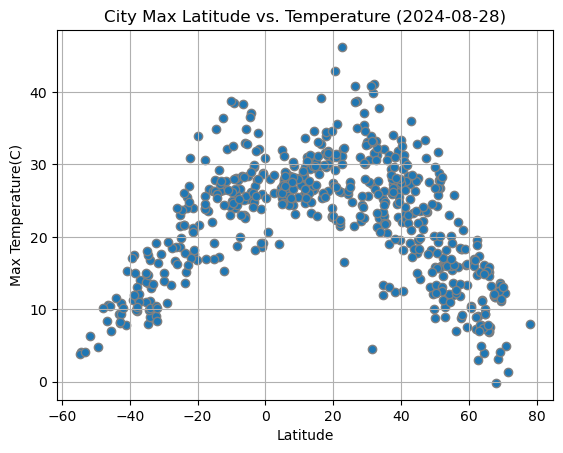

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='grey')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs. Temperature (2024-08-28)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

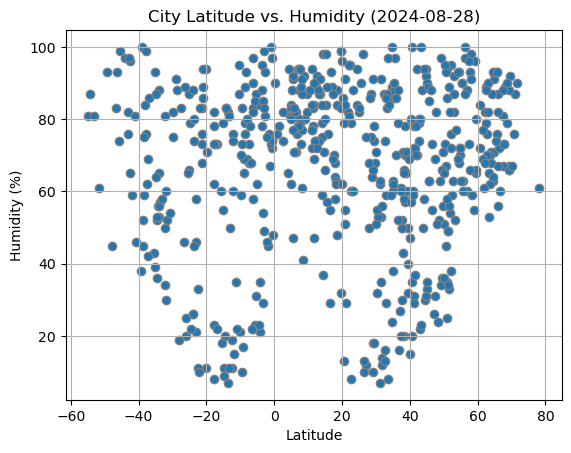

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='grey')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-08-28)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

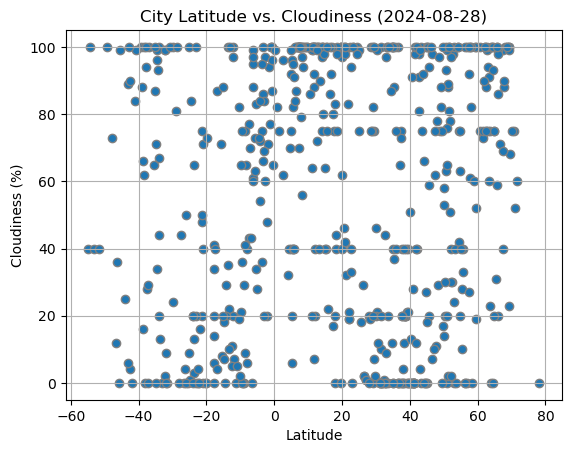

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='grey')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-08-28)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

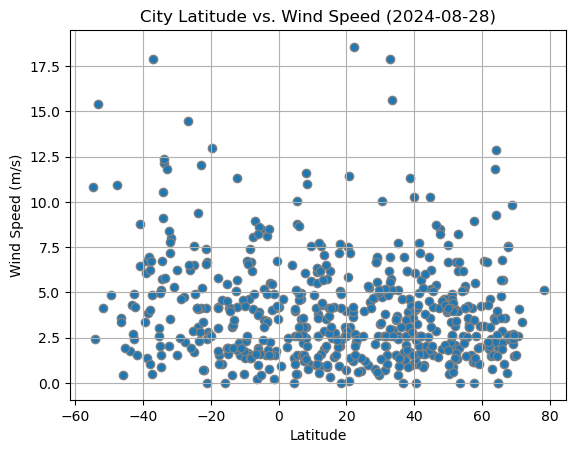

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='grey')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-08-28)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [121]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, title):
    plt.scatter(x, y, color='blue', alpha=0.5, label='Data Points')
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation, p_value = stats.pearsonr(x,y)
    #r_square = correlation ** 2

    print(f"The r^2-value is: {correlation}")
    plt.plot(x, regression_line, color='red', label='Regression Line')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.annotate(line_eq,(0,10),fontsize=15, color='red')
    plt.show()


In [123]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,letterkenny,54.9500,-7.7333,15.45,72,63,5.36,IE,1724859582
2,turpan,42.9333,89.1667,36.00,22,4,0.98,CN,1724859585
3,bethel,41.3712,-73.4140,30.03,72,0,2.06,US,1724859044
4,yellowknife,62.4560,-114.3525,14.67,89,75,4.63,CA,1724859312
5,doka,13.5167,35.7667,23.31,87,99,1.86,SD,1724859588


In [125]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pitimbu,-7.4706,-34.8086,26.57,68,43,8.05,BR,1724859583
7,grytviken,-54.2811,-36.5092,4.06,87,100,2.42,GS,1724859074
9,forster,-32.1667,152.5167,19.09,50,99,7.20,AU,1724859592
14,port-aux-francais,-49.3500,70.2167,4.78,93,100,4.87,TF,1724859227
15,chonchi,-42.6128,-73.8092,10.80,65,4,2.42,CL,1724859096


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6814661738315402


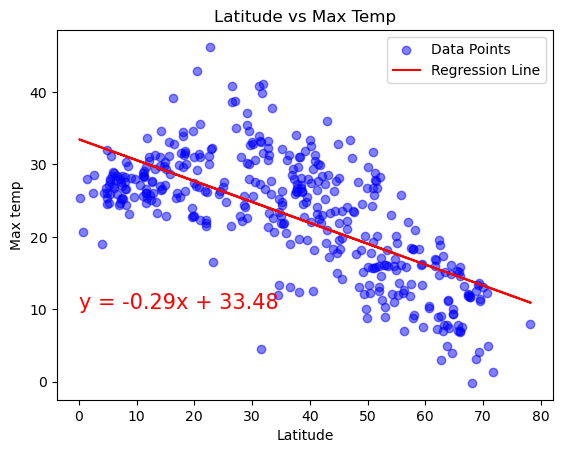

In [128]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max temp', 'Latitude vs Max Temp')

The r^2-value is: 0.830775420199177


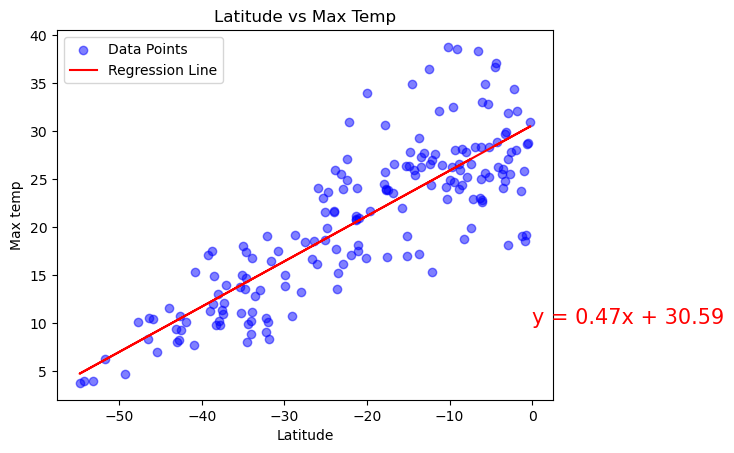

In [130]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max temp', 'Latitude vs Max Temp')

**Discussion about the linear relationship:** 
##We can see the relationship between temperature and locations in the Northern Hemisphere is a negative correlation. Typically, the higher the latitude, the lower the temperature. An r-square value of -0.68 tells us that roughly 68% of the variability in temperature of locations can be explained by Latitude. 

##When looking at the relationship for locations in the Southern Hemisphere, we observe a stronger positive correlation. We can see that roughly 83% of the variability in temperature of southern locations can be explained by Latitude. That is to say, the higher the latitude, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.06076884208447032


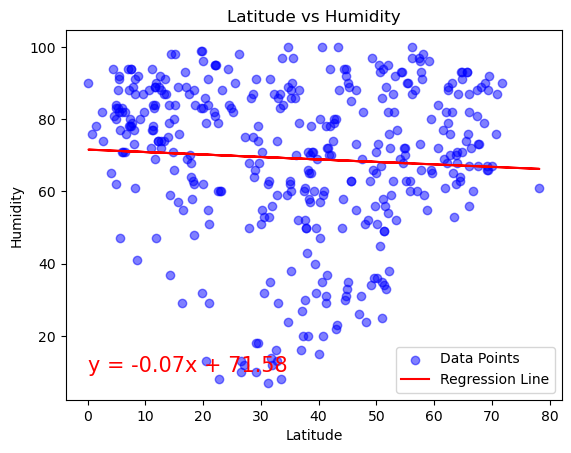

In [134]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Latitude vs Humidity')

The r^2-value is: -0.10156271646264765


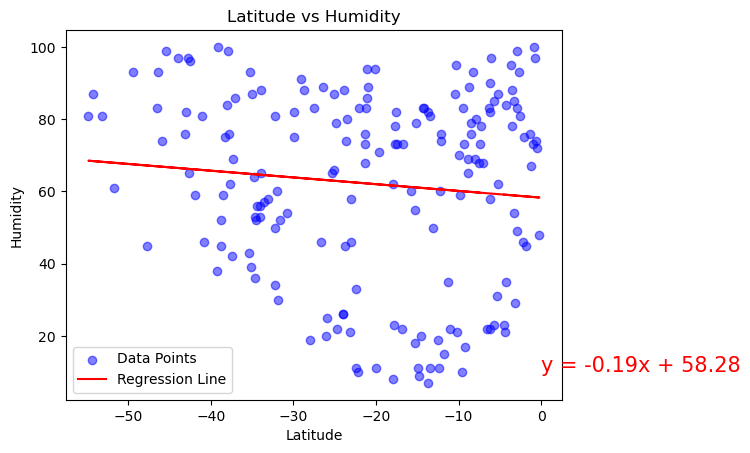

In [136]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Latitude vs Humidity')

**Discussion about the linear relationship:** When looking at the relationship between Latitude vs Humidity, we observe that both the northern and southern hemisphere's show a relationship with little to no significance. We can determine that there isn't a meaningful relationship between a cities latitude and humidity percentage. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.10938063241985094


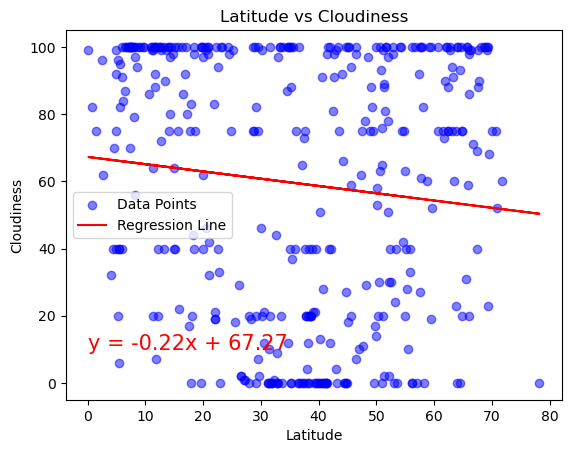

In [139]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Latitude vs Cloudiness')

The r^2-value is: 0.037490933141559615


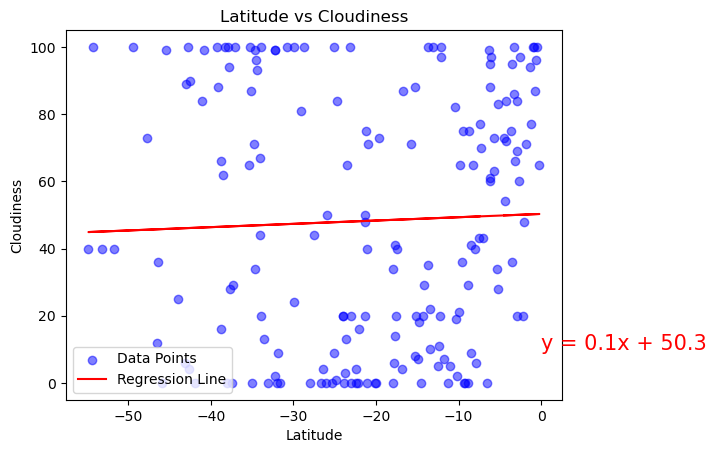

In [141]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Latitude vs Cloudiness')

**Discussion about the linear relationship:** When comparing a city's Latitude and Cloudiness %, we can determine that both the Northern and Southern Hemisphere show a correlation of little to no signifcance. Based on this result, we can determine that there isn't a meaningful relationship between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.01765188594233134


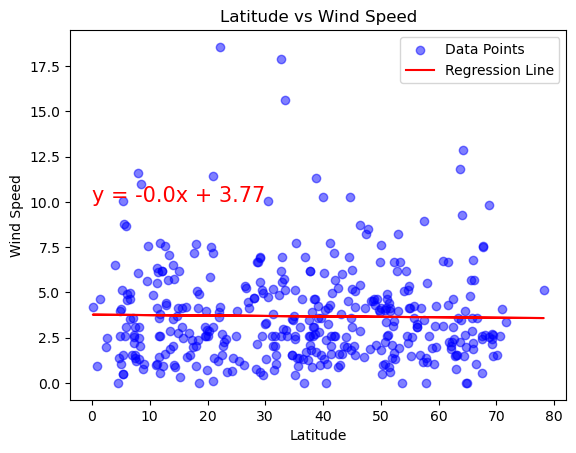

In [143]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Latitude vs Wind Speed')

The r^2-value is: -0.23187962406830664


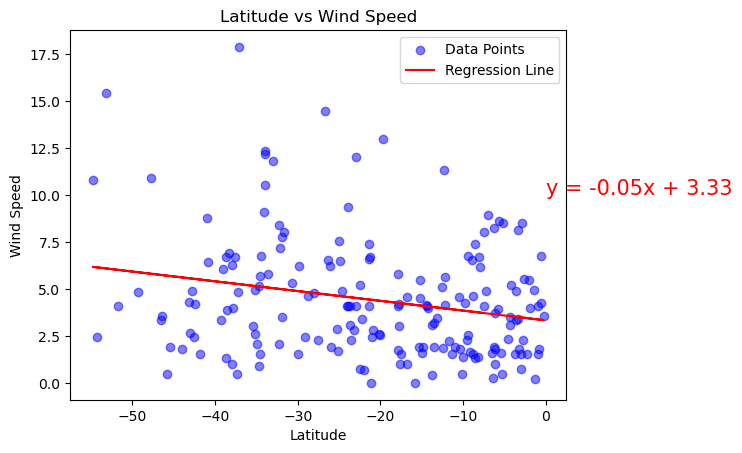

In [145]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Latitude vs Wind Speed')

**Discussion about the linear relationship:** Comparing a city's latitude and wind speed, we can see that there again is little to no significance in both the norhtern and southern hemisphere's. Although we can slightly observe a weak relationship in the southern hemisphere, the correlation is too minor to be declared significant.